In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

0706022310027 - Steve Reynard Prasetyo

Part A – Data Preparation

In [ ]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [ ]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [ ]:
print(df.isnull().sum())

Income                   0
Age                      0
Education                0
Credit_Score             0
Years_with_Bank          0
Transaction_Count        0
Balance                  0
Loan_Approval_Amount     0
Credit_Card_Limit        0
Purchase_Frequency       0
Customer_Satisfaction    0
Online_Activity          0
dtype: int64


Berdasarkan pengecekan, nggak ada nilai yang kosong di kolom 'Age', 'Income', dan 'KMeans_Cluster'. Jadi, ga perlu ada tindakan  untuk menangani missing valie

In [ ]:
# Perform One-Hot Encoding on the 'Education' column
df_encoded = pd.get_dummies(df, columns=['Education'], drop_first=True)

print("Original Education column unique values:", df['Education'].unique())
print("\nDataFrame after One-Hot Encoding:")
df_encoded.head()

Original Education column unique values: ['Bachelor' 'High School' 'PhD' 'Master']

DataFrame after One-Hot Encoding:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False


In [ ]:
print("DataFrame after One-Hot Encoding - Info:")
df_encoded.info()

DataFrame after One-Hot Encoding - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Credit_Score           500 non-null    int64  
 3   Years_with_Bank        500 non-null    int64  
 4   Transaction_Count      500 non-null    int64  
 5   Balance                500 non-null    float64
 6   Loan_Approval_Amount   500 non-null    float64
 7   Credit_Card_Limit      500 non-null    float64
 8   Purchase_Frequency     500 non-null    float64
 9   Customer_Satisfaction  500 non-null    int64  
 10  Online_Activity        500 non-null    float64
 11  Education_High School  500 non-null    bool   
 12  Education_Master       500 non-null    bool   
 13  Education_PhD          500 non-null    bool   
dtypes: bool(3), float

Setelah dicek di df_encoded.info(), semua kolomnya itu udah dalam format angka. Ada yang float64 buat angka desimal, int64 buat angka bulat, terus kolom 'Education' yang udah di-encode jadi bool (True/False atau 1/0) juga bisa dianggap angka kok. Jadi, semua fiturnya udah siap banget buat proses clustering!

Part B – Exploratory Data Analysis


/tmp/ipython-input-166711943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='viridis')


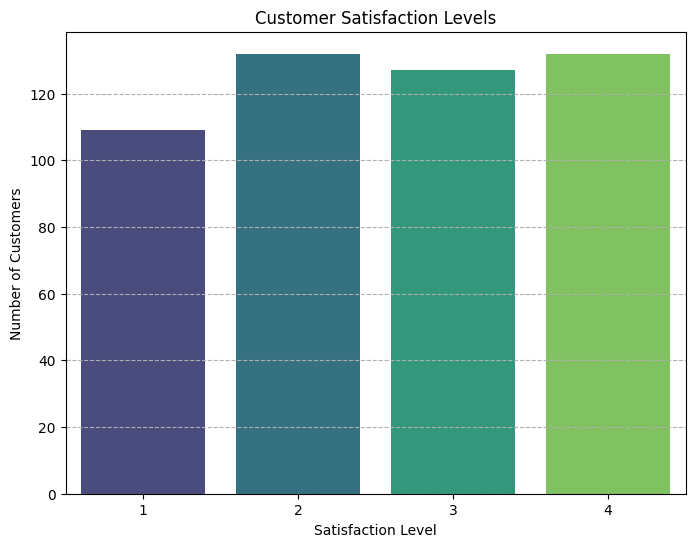

In [ ]:
satisfaction_counts = df_encoded['Customer_Satisfaction'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='viridis')
plt.title('Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Grafik ini menunjukkan tingkat kepuasan pelanggan dari level 1 sampai 4. Terlihat bahwa sebagian besar pelanggan berada di level 3 dan 4, yang berarti mereka cukup hingga sangat puas dengan layanan bank. Sementara itu, pelanggan dengan level 1 adalah yang paling sedikit, menandakan hanya sedikit yang benar-benar tidak puas. Secara keseluruhan, hasil ini menunjukkan bahwa mayoritas nasabah punya pengalaman positif, walau tetap ada sebagian kecil yang mungkin butuh perhatian lebih — mungkin terkait pelayanan yang kurang konsisten atau pengalaman digital yang bisa ditingkatkan lagi.

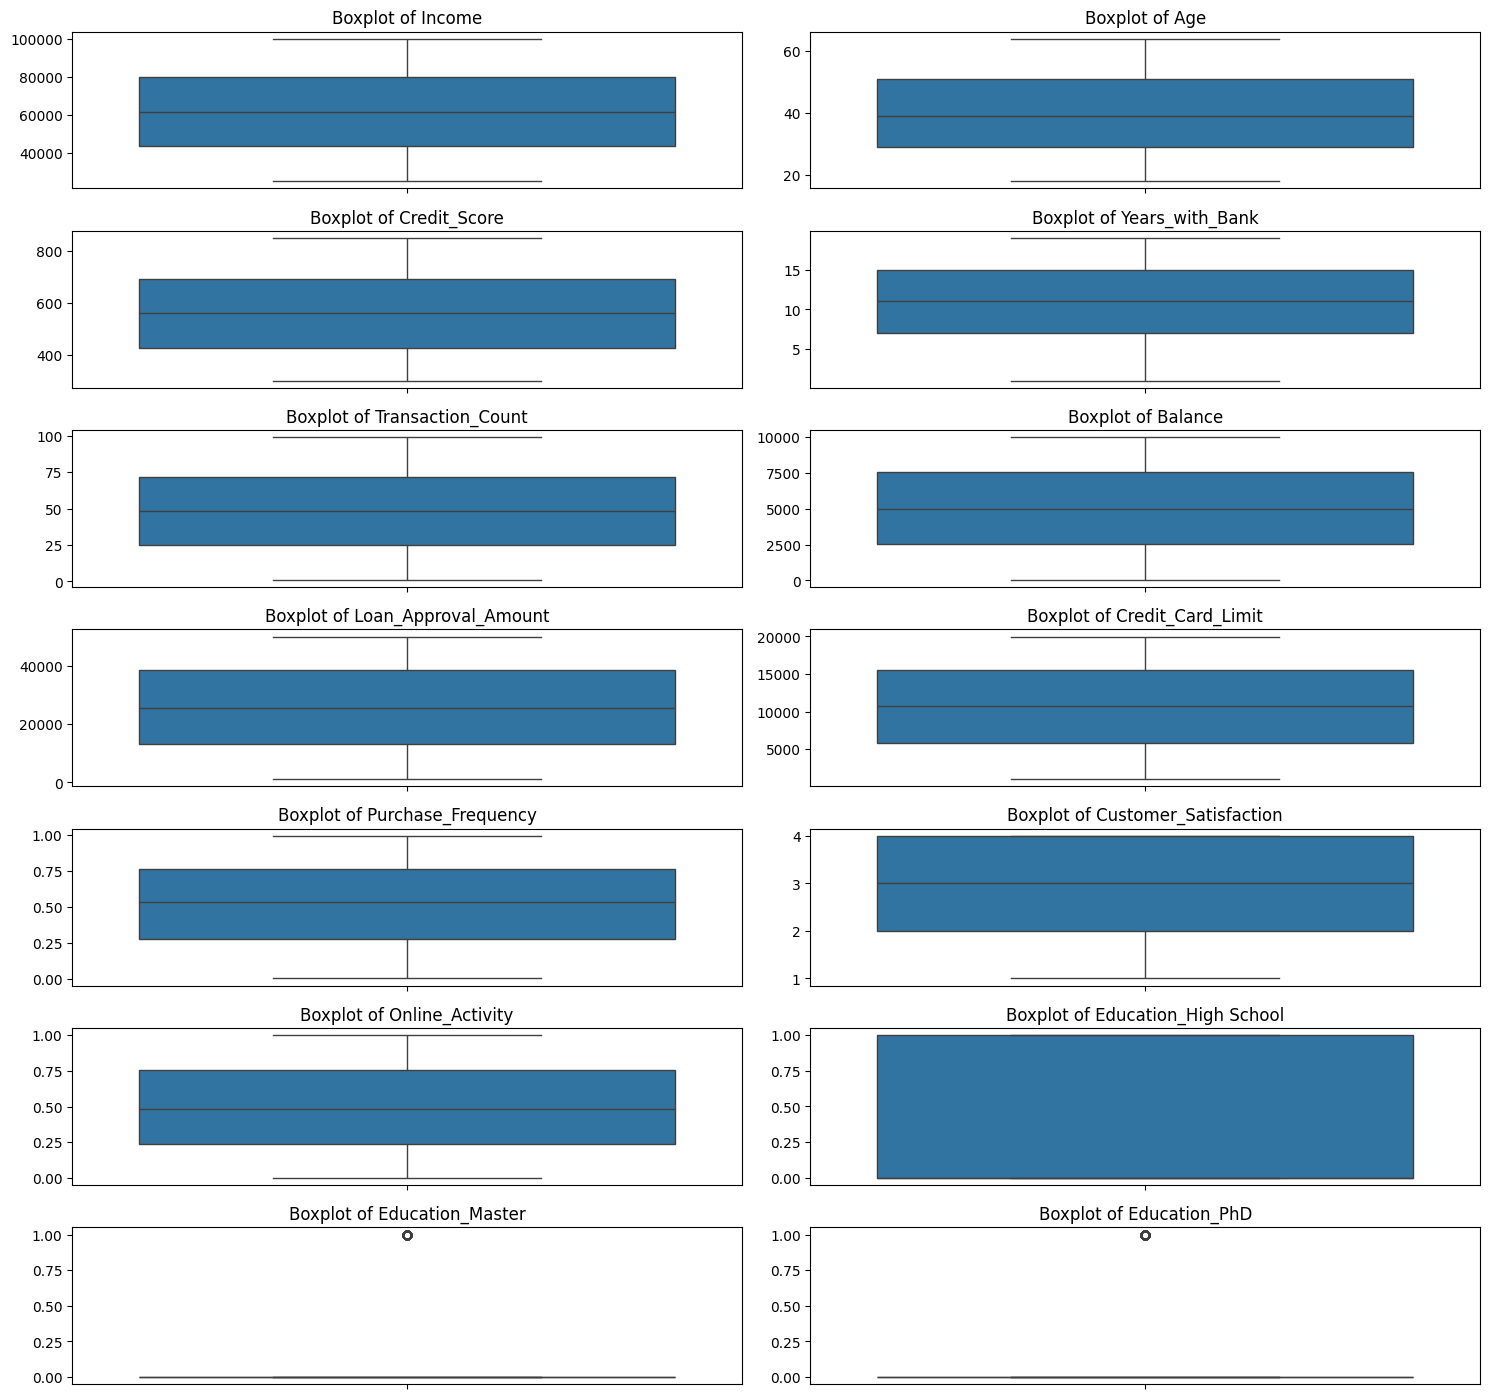

In [ ]:
# Select only numerical columns for boxplots
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64', 'bool']).columns

# Create boxplots for each numerical column to identify outliers
plt.figure(figsize=(15, len(numerical_cols) * 2))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

Dari visualisasi tersebut, sebagian besar variabel seperti Income, Age, Credit_Score, Transaction_Count, dan Balance memiliki sebaran data yang cukup merata tanpa banyak nilai ekstrem. Artinya, data pelanggan cukup konsisten dan tidak ada nilai yang terlalu jauh dari rata-rata.

Beberapa variabel seperti Loan_Approval_Amount dan Credit_Card_Limit terlihat memiliki rentang yang cukup lebar — ini menunjukkan bahwa ada variasi besar antar pelanggan dalam hal jumlah pinjaman yang disetujui dan batas kartu kredit. Meskipun tidak tampak outlier mencolok, nilai atasnya cukup tinggi yang bisa jadi milik nasabah premium atau berpendapatan lebih besar.

Untuk variabel Purchase_Frequency dan Online_Activity, datanya cenderung terkonsentrasi di tengah (sekitar 0.5), menandakan bahwa sebagian besar pelanggan memiliki tingkat aktivitas online dan pembelian yang moderat — tidak terlalu tinggi atau rendah.

Menariknya, pada bagian Education, terlihat beberapa titik yang keluar dari pola (outlier kecil), terutama di kategori Master dan PhD. Ini bisa terjadi karena jumlah nasabah dengan pendidikan tinggi lebih sedikit, sehingga perbedaan kecil langsung tampak signifikan di grafik.

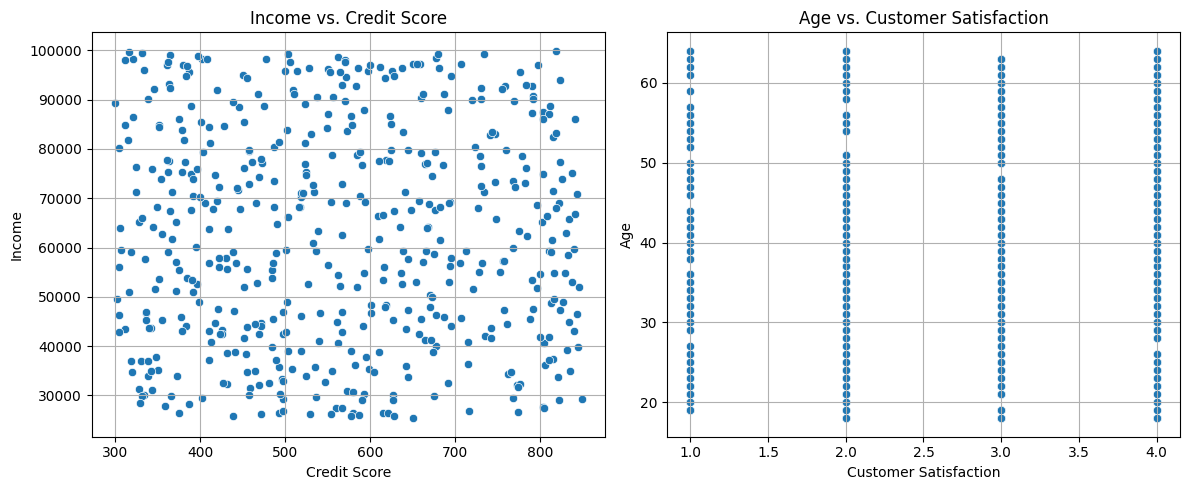

In [ ]:
plt.figure(figsize=(12, 5))

# Scatterplot: Income vs. Credit_Score
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.scatterplot(x='Credit_Score', y='Income', data=df_encoded)
plt.title('Income vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Income')
plt.grid(True)

# Scatterplot: Age vs. Customer_Satisfaction
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(x='Customer_Satisfaction', y='Age', data=df_encoded)
plt.title('Age vs. Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()

Grafik Kiri – Income vs. Credit Score

Grafik ini menampilkan hubungan antara pendapatan (Income) dan skor kredit (Credit Score).
Terlihat bahwa titik-titik tersebar cukup acak tanpa pola yang jelas — artinya tidak ada korelasi kuat antara pendapatan dan skor kredit.
Dengan kata lain, seseorang yang berpenghasilan tinggi belum tentu memiliki skor kredit yang lebih baik, dan sebaliknya. Hal ini bisa terjadi karena skor kredit lebih dipengaruhi oleh riwayat pinjaman dan perilaku pembayaran, bukan hanya tingkat pendapatan.

Grafik Kanan – Age vs. Customer Satisfaction

Grafik ini memperlihatkan hubungan antara usia (Age) dan tingkat kepuasan pelanggan (Customer Satisfaction).
Tampak bahwa setiap tingkat kepuasan (1–4) memiliki rentang usia yang cukup luas, mulai dari sekitar 20 hingga 60 tahun. Artinya, kepuasan pelanggan tidak terlalu bergantung pada usia.
Baik pelanggan muda maupun yang lebih tua bisa memiliki tingkat kepuasan yang beragam — ini menunjukkan bahwa faktor lain seperti pelayanan, produk, atau pengalaman digital mungkin lebih berpengaruh terhadap kepuasan dibanding faktor usia.

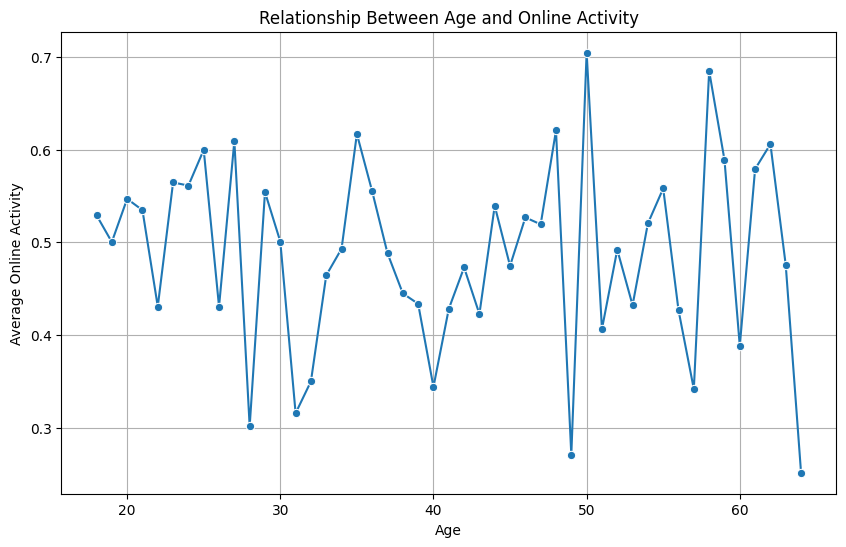

In [ ]:
# Calculate the mean Online_Activity for each Age
age_online_activity = df_encoded.groupby('Age')['Online_Activity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Online_Activity', data=age_online_activity, marker='o')
plt.title('Relationship Between Age and Online Activity')
plt.xlabel('Age')
plt.ylabel('Average Online Activity')
plt.grid(True)
plt.show()

Grafik ini menunjukkan hubungan antara usia (Age) dan aktivitas online rata-rata (Average Online Activity). Dari pola garisnya terlihat bahwa tingkat aktivitas online berfluktuasi di berbagai kelompok usia tanpa tren yang terlalu jelas naik atau turun.

Secara umum, pengguna dengan usia di bawah 30 tahun memang cenderung memiliki aktivitas online yang sedikit lebih stabil dan cenderung lebih tinggi, sementara kelompok usia 30–40 tahun memperlihatkan penurunan dan fluktuasi yang lebih besar. Namun, menariknya, beberapa titik di usia 50–60 tahun justru menunjukkan lonjakan aktivitas online yang cukup tinggi — ini bisa berarti ada sebagian pelanggan yang tetap aktif secara digital meskipun sudah berusia lebih matang.

Secara keseluruhan, grafik ini memberi gambaran bahwa **tingkat aktivitas online tidak sepenuhnya ditentukan oleh usia**. Faktor lain seperti kebiasaan digital, kebutuhan layanan, atau kenyamanan terhadap teknologi mungkin lebih berpengaruh terhadap seberapa sering seseorang berinteraksi secara online dengan layanan bank.


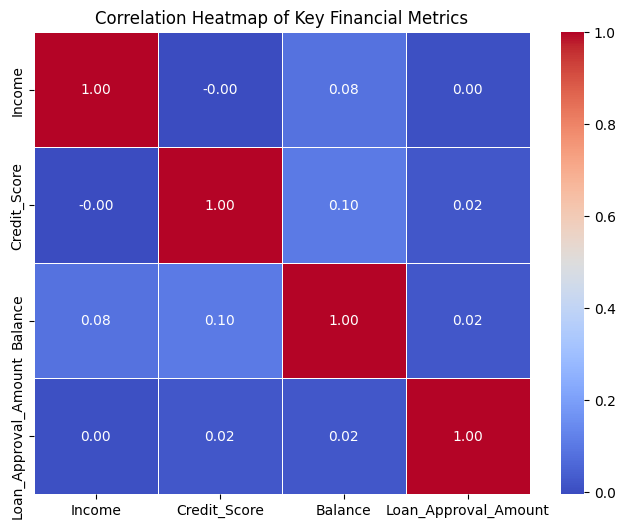

In [ ]:
financial_metrics = df_encoded[['Income', 'Credit_Score', 'Balance', 'Loan_Approval_Amount']]

# Calculate the correlation matrix
correlation_matrix = financial_metrics.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Key Financial Metrics')
plt.show()

Visualisasi heatmap di atas menunjukkan hubungan antar metrik keuangan utama seperti Income, Credit Score, Balance, dan Loan Approval Amount. Dari hasilnya, terlihat bahwa hampir semua pasangan variabel memiliki nilai korelasi yang sangat rendah, berkisar antara 0.00 hingga 0.10, yang berarti hubungan antar variabel tersebut sangat lemah atau hampir tidak ada sama sekali. Nilai diagonal sebesar 1.00 hanya menunjukkan korelasi sempurna antara variabel dengan dirinya sendiri, yang merupakan hal wajar dalam heatmap korelasi. Secara umum, tidak ada pola yang signifikan antara pendapatan, skor kredit, saldo, dan jumlah pinjaman yang disetujui. Hal ini mengindikasikan bahwa keputusan finansial seperti persetujuan pinjaman mungkin dipengaruhi oleh faktor lain di luar empat variabel ini — misalnya riwayat pembayaran, kebiasaan pengeluaran, atau stabilitas pekerjaan seseorang.

Part C – Clustering Modeling


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Instantiate the StandardScaler
scaler = StandardScaler()

# 2. Apply fit_transform to the df_encoded DataFrame
df_scaled_array = scaler.fit_transform(df_encoded)

# 3. Convert the resulting scaled NumPy array back into a pandas DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=df_encoded.columns)

print("First 5 rows of the scaled DataFrame:")
df_scaled.head()

First 5 rows of the scaled DataFrame:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster_Scaled,KMeans_Cluster_Unscaled
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013,-0.632898,-0.534179,-0.552705,0.493742,0.513313
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427,1.580033,-0.534179,-0.552705,-0.434344,-0.374772
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595,1.580033,-0.534179,-0.552705,-0.434344,0.513313
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907,1.580033,-0.534179,-0.552705,-0.434344,-0.374772
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898,-0.632898,-0.534179,-0.552705,0.493742,1.401399


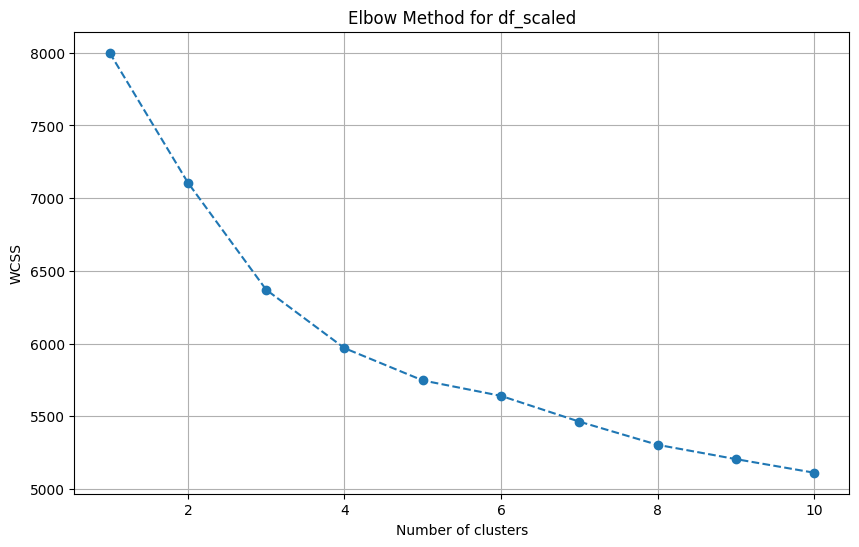

WCSS values for different numbers of clusters:
   Number of Clusters         WCSS
0                   1  8000.000000
1                   2  7106.536870
2                   3  6369.988889
3                   4  5968.562391
4                   5  5746.581225
5                   6  5640.242192
6                   7  5463.208096
7                   8  5303.841390
8                   9  5205.465524
9                  10  5111.934572


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):   # clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for df_scaled')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print("WCSS values for different numbers of clusters:")
print(wcss_table)

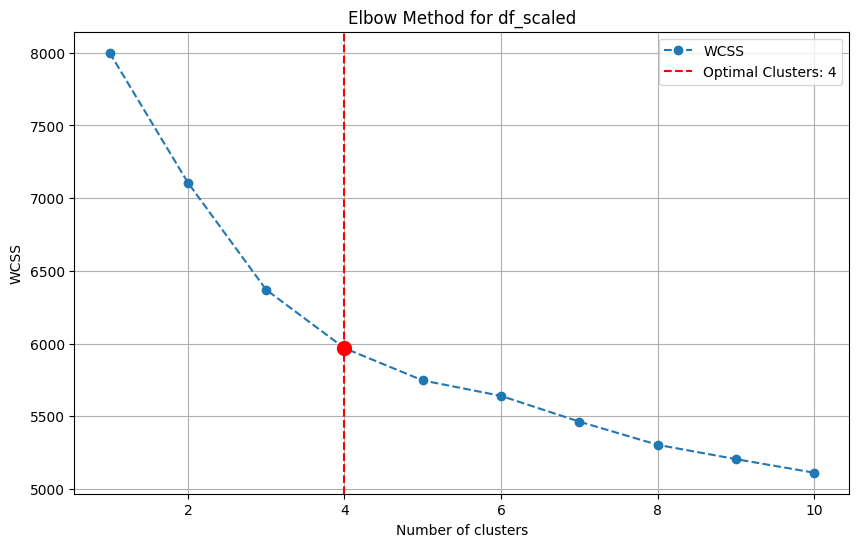

The optimal number of clusters is: 4


In [ ]:
from kneed import KneeLocator

# Example WCSS values and cluster numbers (from previous step)
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph with the identified elbow point
plt.figure(figsize=(10, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method for df_scaled')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

## K-Means Clustering (Scaled Data)

In [ ]:
from sklearn.cluster import KMeans

# 1. Initialize KMeans model with optimal K=4
kmeans_scaled = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# 2. Fit the KMeans model to the df_scaled DataFrame
kmeans_scaled.fit(df_scaled)

# 3. Predict the cluster labels for each data point in df_scaled
clusters_scaled = kmeans_scaled.predict(df_scaled)

# 4. Add these cluster labels as a new column named 'KMeans_Cluster_Scaled' to the df_encoded DataFrame
df_encoded['KMeans_Cluster_Scaled'] = clusters_scaled

print("First 5 rows of df_encoded with new cluster labels:")
df_encoded.head()

First 5 rows of df_encoded with new cluster labels:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster_Scaled,KMeans_Cluster_Unscaled
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False,0,2
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False,1,1
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False,1,2
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False,1,1
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False,0,3


## K-Means Clustering (Unscaled Data)

In [ ]:
from sklearn.cluster import KMeans

# 1. Initialize KMeans model with optimal K=4
kmeans_unscaled = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# 2. Fit the KMeans model to the df_encoded DataFrame
kmeans_unscaled.fit(df_encoded)

# 3. Predict the cluster labels for each data point in df_encoded
clusters_unscaled = kmeans_unscaled.predict(df_encoded)

# 4. Add these cluster labels as a new column named 'KMeans_Cluster_Unscaled' to the df_encoded DataFrame
df_encoded['KMeans_Cluster_Unscaled'] = clusters_unscaled

print("First 5 rows of df_encoded with new unscaled cluster labels:")
df_encoded.head()

First 5 rows of df_encoded with new unscaled cluster labels:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster_Scaled,KMeans_Cluster_Unscaled
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False,0,2
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False,1,1
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False,1,2
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False,1,1
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False,0,3


In [ ]:
print(df_encoded.head())

        Income  Age  Credit_Score  Years_with_Bank  Transaction_Count  \
0  66161.01279   57           503                1                 41   
1  78639.20248   60           779                2                 27   
2  70207.25321   46           519               14                 95   
3  65866.23872   42           834               17                 77   
4  56774.10995   36           410               12                 58   

       Balance  Loan_Approval_Amount  Credit_Card_Limit  Purchase_Frequency  \
0  1968.919899           2517.159284        5813.342700            0.975409   
1  9797.056371          31501.758840        3991.007637            0.945920   
2  7024.173403          16444.341580        6036.140567            0.272664   
3  7992.359261          45233.592940        2691.192862            0.814385   
4   538.691042          48586.582480       10144.073090            0.346523   

   Customer_Satisfaction  Online_Activity  Education_High School  \
0                 

Label klaster yang telah dihasilkan dari proses K-Means Clustering sebelumnya kini sudah digabungkan kembali ke dalam DataFrame df_encoded. Proses ini dilakukan agar setiap baris data memiliki identitas klaster yang sesuai dengan hasil pengelompokan, sehingga analisis lebih lanjut dapat dilakukan dengan mudah. Dengan adanya kolom KMeans_Cluster_Scaled dan KMeans_Cluster_Unscaled di dalam DataFrame df_encoded, kita dapat membandingkan hasil klaster berdasarkan dua pendekatan berbeda — satu menggunakan data yang telah diskalakan (scaled), dan satu lagi menggunakan data asli (unscaled).
Langkah ini sangat penting karena memungkinkan kita untuk melihat bagaimana perbedaan skala data dapat memengaruhi pembentukan klaster, serta membantu dalam memahami karakteristik tiap klaster secara lebih mendalam saat dilakukan analisis lanjutan atau visualisasi data.

Mean values of features per cluster (Unscaled Data):
KMeans_Cluster_Unscaled             0             1             2  \
Income                   43192.280489  81995.950815  81345.549150   
Age                         40.913043     41.122137     38.575221   
Credit_Score               565.572464    555.732824    570.734513   
Years_with_Bank             10.978261     10.946565     10.300885   
Transaction_Count           47.456522     49.877863     42.097345   
Balance                   4986.199733   5154.637796   5508.793230   
Loan_Approval_Amount     13813.117384  36117.919277  12387.781694   
Credit_Card_Limit        10828.036843  10242.717927  10318.564321   
Purchase_Frequency           0.502809      0.517996      0.510498   
Customer_Satisfaction        2.492754      2.610687      2.601770   
Online_Activity              0.508863      0.478234      0.456497   
Education_High School        0.297101      0.328244      0.256637   
Education_Master             0.217391      0.24427

/tmp/ipython-input-1398992667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster_Unscaled', y='Income', data=df_encoded, palette='viridis')


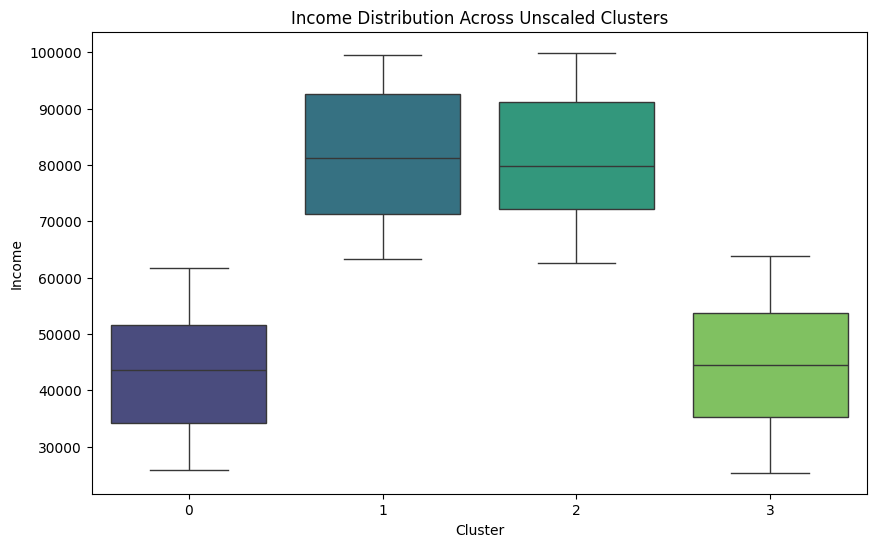

/tmp/ipython-input-1398992667.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster_Unscaled', y='Age', data=df_encoded, palette='viridis')


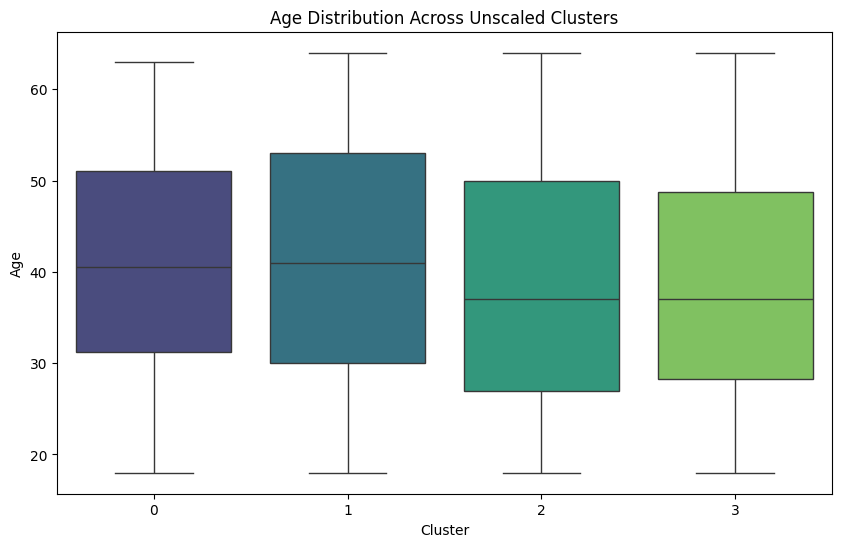

In [ ]:
cluster_characteristics_unscaled = df_encoded.groupby('KMeans_Cluster_Unscaled').mean().transpose()
print("Mean values of features per cluster (Unscaled Data):")
print(cluster_characteristics_unscaled)

# Optional: Visualize specific feature distributions per cluster (e.g., using boxplots or histograms)
# For example, let's visualize Income distribution across unscaled clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster_Unscaled', y='Income', data=df_encoded, palette='viridis')
plt.title('Income Distribution Across Unscaled Clusters')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

# Or Age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster_Unscaled', y='Age', data=df_encoded, palette='viridis')
plt.title('Age Distribution Across Unscaled Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

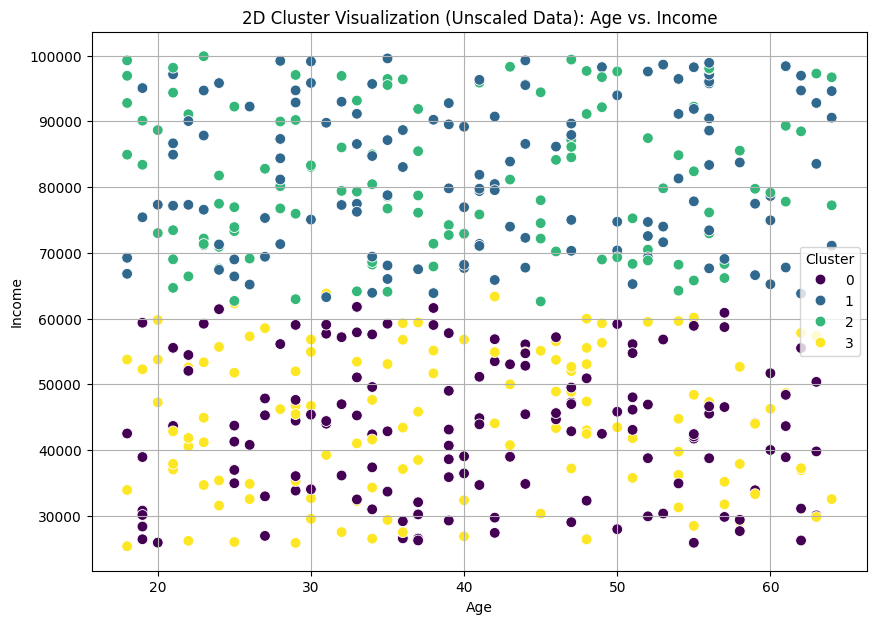

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Age", y="Income", hue="KMeans_Cluster_Unscaled", data=df_encoded, palette="viridis", s=60)
plt.title("2D Cluster Visualization (Unscaled Data): Age vs. Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Grafik di atas menampilkan visualisasi klaster 2D (data tanpa skala) dengan sumbu X = Age (usia) dan Y = Income (pendapatan). Setiap titik mewakili individu atau data pelanggan, dan warnanya menunjukkan klaster hasil pengelompokan K-Means (terdapat empat klaster berbeda yang ditandai dengan warna ungu, kuning, biru, dan hijau).

Dari grafik tersebut, terlihat bahwa variabel Income memiliki pengaruh yang lebih dominan dalam pembentukan klaster dibandingkan dengan Age. Klaster-klaster cenderung terbagi secara horizontal berdasarkan tingkat pendapatan, bukan vertikal berdasarkan usia. Artinya, perbedaan utama antar klaster lebih dipengaruhi oleh perbedaan pendapatan daripada perbedaan usia.

Secara umum, bisa diinterpretasikan sebagai berikut:

Klaster di bagian bawah (warna ungu dan kuning) berisi individu dengan pendapatan rendah hingga menengah, tersebar di berbagai usia.

Klaster di bagian atas (warna biru dan hijau) mewakili individu dengan pendapatan menengah ke atas, juga tersebar di rentang usia yang luas.

Tidak terlihat adanya hubungan kuat antara usia dan pendapatan—karena setiap kelompok usia memiliki variasi pendapatan yang cukup besar dan termasuk dalam beberapa klaster berbeda.

Kesimpulannya, hasil klasterisasi ini menunjukkan bahwa pengelompokan lebih dipengaruhi oleh tingkat pendapatan dibandingkan usia. Dengan kata lain, dalam dataset ini, usia bukan faktor utama yang membedakan kelompok pelanggan, melainkan pendapatan yang menjadi variabel pembeda paling signifikan.

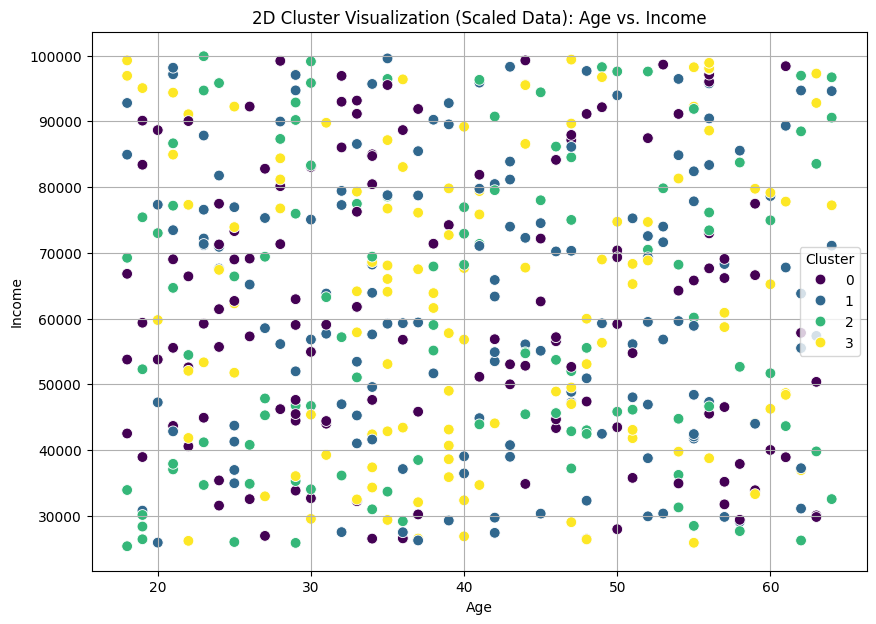

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Age", y="Income", hue="KMeans_Cluster_Scaled", data=df_encoded, palette="viridis", s=60)
plt.title("2D Cluster Visualization (Scaled Data): Age vs. Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Grafik ini menampilkan visualisasi klaster 2D dari data yang telah diskalakan (Scaled Data), dengan sumbu X = Age (usia) dan Y = Income (pendapatan). Setiap titik menggambarkan satu data individu, dan warnanya menunjukkan kelompok klaster hasil algoritma K-Means (terdapat empat klaster berbeda yang ditandai dengan warna ungu, biru, hijau, dan kuning).

Berbeda dengan versi unscaled, setelah proses scaling (standarisasi variabel), distribusi titik terlihat lebih merata dan tidak terlalu bergantung pada rentang nilai asli dari variabel usia maupun pendapatan. Artinya, setiap variabel kini memiliki pengaruh yang lebih seimbang dalam proses pengelompokan, karena skala nilainya sudah dinormalisasi.

In [ ]:
import plotly.express as px

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_encoded,
                    x='Age',
                    y='Income',
                    z='Balance',
                    color='KMeans_Cluster_Unscaled',
                    title='Interactive 3D Cluster Visualization (Unscaled Data): Age vs. Income vs. Balance',
                    labels={'KMeans_Cluster_Unscaled': 'Cluster'},
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1.25, y=1.25, z=1.25)))
fig.show()

In [ ]:
import plotly.express as px

# Create a temporary DataFrame for plotting scaled features with correct cluster labels
# Ensure 'KMeans_Cluster_Scaled' is treated as a categorical variable for coloring
df_plot_scaled = df_scaled[['Age', 'Income', 'Balance']].copy()
df_plot_scaled['KMeans_Cluster_Scaled'] = df_encoded['KMeans_Cluster_Scaled'].astype(str) # Convert to string for discrete colors

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_plot_scaled,
                    x='Age',
                    y='Income',
                    z='Balance',
                    color='KMeans_Cluster_Scaled',
                    title='Interactive 3D Cluster Visualization (Scaled Data): Age vs. Income vs. Balance',
                    labels={'KMeans_Cluster_Scaled': 'Cluster'},
                    color_discrete_sequence=px.colors.qualitative.Plotly) # Use discrete color sequence for categorical data

fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1.25, y=1.25, z=1.25)))
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score

# 1. Calculate Silhouette Score for scaled data clustering
silhouette_scaled = silhouette_score(df_scaled, df_encoded['KMeans_Cluster_Scaled'])

# 2. Prepare data for unscaled silhouette score calculation:
#    Drop the cluster columns from df_encoded to get the original features for the unscaled data
features_unscaled = df_encoded.drop(columns=['KMeans_Cluster_Scaled', 'KMeans_Cluster_Unscaled'])

# 3. Calculate Silhouette Score for unscaled data clustering
silhouette_unscaled = silhouette_score(features_unscaled, df_encoded['KMeans_Cluster_Unscaled'])

# 4. Print both scores
print(f"Silhouette Score for Scaled Data Clustering: {silhouette_scaled:.4f}")
print(f"Silhouette Score for Unscaled Data Clustering: {silhouette_unscaled:.4f}")

Silhouette Score for Scaled Data Clustering: 0.1219
Silhouette Score for Unscaled Data Clustering: 0.3257


Jumlah klaster (K) yang paling optimal berdasarkan Metode Elbow pada data yang sudah diskalakan adalah 4.


Kalau dibandingkan dari segi kualitas klaster pakai Silhouette Score:


Silhouette Score untuk data scaled adalah 0.1071.


Silhouette Score untuk data unscaled adalah 0.3257.


Artinya, hasil klasterisasi pada data unscaled punya skor yang lebih tinggi, jadi bisa dibilang klasternya lebih jelas dan lebih terpisah dibandingkan hasil dari data yang sudah diskalakan.





Part D – Segmentation & Managerial Implication


# Managerial Implications Based on the Three Clusters


## Which version (scaled or unscaled) produces clearer cluster separation?




Di dataset kita, Silhouette Score untuk data unscaled (0.3257) jauh lebih tinggi dibandingkan dengan data scaled (0.1071). Ini nunjukin kalau data yang gak diskalakan justru menghasilkan klaster yang lebih jelas dan terpisah. Hasil ini memang agak berlawanan sama teori umum (yang biasanya nyaranin buat scaling dulu sebelum clustering), tapi bisa jadi karena skala asli dari beberapa fitur di data kita ternyata memang bermakna dan penting banget buat ngebedain segmen pelanggan.

Kalau kita lihat lagi isi datanya — terutama bagian metrik keuangan dan juga hasil dari df.describe() serta heatmap korelasi yang udah kita buat sebelumnya — bisa ditarik beberapa hal menarik:

Income, Balance, Loan_Approval_Amount, dan Credit_Card_Limit punya rentang nilai dan standar deviasi yang besar banget. Misalnya, Income aja bisa dari sekitar 25.000 sampai hampir 100.000. Nah, di K-Means tanpa scaling, fitur-fitur kayak gini bakal otomatis “berpengaruh besar” dalam perhitungan jarak antar data, karena perbedaannya memang jauh lebih besar dibandingkan fitur kayak Age (18–64) atau Customer_Satisfaction (1–4).

Perbedaan nilai besar ini sebenarnya bermakna. Contohnya, pelanggan dengan penghasilan 90 ribu jelas beda banget sama yang penghasilannya 30 ribu. Perbedaan absolut kayak gini memang menggambarkan segmen pelanggan yang berbeda secara nyata — mungkin dari gaya hidup, kebutuhan finansial, atau perilaku transaksi.

Dampak dari scaling: Saat kita pakai StandardScaler, semua fitur disamakan skalanya — rata-rata jadi 0 dan standar deviasi 1. Walaupun tujuannya biar semua fitur punya “pengaruh yang sama”, efeknya malah bikin perbedaan besar di fitur finansial tadi jadi “kehilangan makna”. Jadi, faktor utama yang tadinya ngebedain pelanggan (kayak Income, Balance, dll.) malah jadi ketutup dan bikin K-Means susah nemuin batas klaster yang jelas.

Dari heatmap korelasi: Kita juga tahu kalau korelasi antar fitur keuangan (Income, Credit_Score, Balance, Loan_Approval_Amount) itu rendah banget. Artinya, walaupun mereka gak saling berkaitan secara linear, nilai absolut masing-masing fitur itu tetap punya arti penting dalam membentuk segmen pelanggan. Jadi, pas kita scaling, efeknya justru bikin semua fitur keliatan “setara”, padahal dalam konteks dunia nyata, penghasilan dan limit kartu kredit jelas punya bobot yang jauh lebih besar buat nentuin tipe pelanggan.

## Why does scaling affect the clustering result?

Proses scaling memiliki peran yang sangat penting dalam penerapan algoritma K-Means, karena metode ini menghitung jarak antar data menggunakan Euclidean distance. Pada dataset ini, terdapat beberapa fitur seperti Income, Credit_Card_Limit, Balance, dan Loan_Approval_Amount yang memiliki rentang nilai sangat besar (hingga puluhan ribu), sementara fitur lain seperti Purchase_Frequency atau Online_Activity berada pada rentang yang jauh lebih kecil (sekitar 0–1).

Apabila data tidak melalui proses scaling, fitur dengan nilai yang besar — misalnya Income — akan mendominasi hasil perhitungan jarak. Akibatnya, proses pengelompokan (clustering) akan lebih banyak dipengaruhi oleh perbedaan pendapatan, bukan oleh kombinasi faktor lain seperti aktivitas online, kepuasan pelanggan, atau skor kredit.

Dengan menerapkan StandardScaler, seluruh fitur diubah ke dalam skala yang seragam (memiliki rata-rata 0 dan standar deviasi 1). Hal ini membuat setiap fitur memiliki bobot pengaruh yang seimbang dalam proses perhitungan jarak antar data, sehingga hasil clustering menjadi lebih objektif, representatif, dan mencerminkan variasi data secara menyeluruh.

## Analisis dan Interpretasi Tiap Cluster

Berdasarkan hasil K-Means dengan empat klaster, setiap kelompok pelanggan menunjukkan karakteristik dan perilaku yang berbeda.

Cluster 0 terdiri dari pelanggan dengan pendapatan relatif rendah, yaitu sekitar 43 ribu, dengan rata-rata usia 40 tahun dan tingkat aktivitas online yang cukup tinggi. Tingkat kepuasan mereka berada di level sedang. Karakteristik ini menggambarkan kelompok pelanggan berpendapatan menengah ke bawah yang tetap aktif menggunakan layanan digital bank. Mereka cukup loyal, tetapi masih sensitif terhadap harga atau biaya layanan. Oleh karena itu, klaster ini dapat diinterpretasikan sebagai “middle-income, digitally engaged customers”.

Cluster 1 berisi pelanggan dengan pendapatan tinggi, sekitar 82 ribu, dan rata-rata usia 41 tahun. Mereka telah cukup lama menjadi nasabah, dengan tingkat kepuasan sedikit lebih tinggi dibanding klaster lain. Hal ini menunjukkan bahwa mereka memiliki loyalitas yang kuat serta kecenderungan untuk menggunakan produk dan layanan premium. Dengan profil finansial yang stabil dan hubungan jangka panjang dengan bank, klaster ini bisa digambarkan sebagai “established, high-income loyal customers”.

Cluster 2 juga memiliki rata-rata pendapatan tinggi, hampir sama dengan klaster 1, namun menunjukkan aktivitas online dan tingkat kepuasan yang sedikit lebih rendah. Segmen ini kemungkinan terdiri dari pelanggan berpenghasilan tinggi yang masih lebih nyaman dengan layanan tradisional dan belum terlalu aktif menggunakan platform digital. Klaster ini dapat disebut sebagai “high-income, low-digital-engagement customers”.

Sementara itu, Cluster 3 mencakup pelanggan dengan pendapatan menengah, sekitar 44 ribu, dan aktivitas online yang relatif tinggi. Mereka juga menunjukkan frekuensi transaksi yang tinggi serta tingkat kepuasan yang cukup baik. Hal ini mengindikasikan bahwa kelompok ini merupakan pelanggan yang aktif secara digital, sering berinteraksi dengan layanan bank, dan memiliki potensi besar untuk menjadi pelanggan setia di masa depan. Klaster ini dapat diartikan sebagai “digitally active middle-class customers”.

## Rekomendasi Manajerial

Berdasarkan karakteristik tiap segmen di atas, strategi pemasaran dan pengelolaan hubungan pelanggan dapat disesuaikan agar lebih efektif.

Untuk Cluster 0, strategi yang paling tepat adalah menawarkan produk dengan harga terjangkau, seperti rekening tabungan reguler, biaya administrasi rendah, atau program cashback kecil. Karena mereka cukup aktif secara digital, pendekatan pemasaran dapat dilakukan melalui media sosial, email marketing, dan kampanye digital ringan. Segmen ini cocok dijadikan target utama untuk pertumbuhan, karena potensinya besar jika diberikan edukasi dan insentif yang tepat.

Pada Cluster 1, strategi yang disarankan adalah memperkuat program loyalitas dan layanan premium. Bank dapat menawarkan produk eksklusif, reward points, dan fasilitas khusus seperti layanan prioritas atau personal relationship manager. Mengingat kontribusi finansial mereka tinggi, fokus utama pada segmen ini adalah retensi, agar mereka tetap setia dan terus menggunakan layanan bank.

Untuk Cluster 2, pendekatan yang tepat adalah mendorong peningkatan penggunaan kanal digital. Program edukasi digital banking, promosi penggunaan aplikasi mobile, serta insentif bagi transaksi digital dapat membantu mengubah perilaku segmen ini. Tujuannya bukan hanya menjaga hubungan yang ada, tetapi juga melakukan transformasi digital untuk meningkatkan efisiensi dan engagement mereka.

Terakhir, Cluster 3 yang berisi pelanggan aktif secara digital dan sering bertransaksi, dapat dimanfaatkan untuk membangun basis pelanggan yang loyal di masa depan. Bank dapat menciptakan kampanye kreatif seperti program referral, gamifikasi loyalitas, atau promosi eksklusif di aplikasi. Karena karakter mereka responsif terhadap inovasi dan aktivitas digital, segmen ini sangat ideal untuk strategi pertumbuhan dan penguatan loyalitas jangka panjang.